# Tarea 2 - Regresion Polinomial & Feature engineering

### Parte 1 - Modelo exponencial de covid-19 usando feature-eng

Usando el ejemplo de covid-19 en el notebook de feature-eng (https://colab.research.google.com/drive/1sJV2HG7tQgCGKES3-dIclzHQJ9qAWB3b?usp=sharing) crear un modelo de covid-19 para Guatemala.

* Convertir la fecha a un entero "número de día", por ejemplo si se usan datos desde el 22 de abril, este es el día 0, el 23 es el día 1.
* Aplicar regresión lineal sobre la variable "Confirmed" transformada.
* Una vez entrenado el modelo usarlo para aproximar la cantidad de casos confirmados para el 30 de mayo. Se debe reportar la cantidad de casos, no la cantidad transformada obtenida.

### Parte 2 - Modelo polinomial de calidad de vinos

Es permitido utilizar [sklearn.preprocessing.polynomialfeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)


### Instrucciones

1. Seleccionar y transformar(generando las combinaciones polinomiales para un polinomio de grado dos o tres a elección) las features que considere que son las mejores para predecir la calidad del vino, utilizar como minimo 2 features. Para seleccionar las features, hacer un analisis exploratorio por ejemplo(pero no limitado a ):  graficando y viendo la forma en que se comportan los datos.

 Por ejemplo, se tienen las features "a" y "b" y seleccionamos polinomio de grado 2, hacemos feature engineering para obtener :
 
 $[a,b,a^{2},b^{2},ab]$
 
 No olvidar el "bias" (parámetro multiplicado por 1) ,con lo cual el dataset puede quedar con las columnas:
 
 $[1,a,b,a^{2},b^{2},ab]$
2. Una vez transformada la data aplicar regresion lineal con las features polinomiales usando Tensorflow.

Requisitos adicionales:
* Se debe agregar al notebook un screenshot del grafo de tensorboard, simplificando(usando  names , y name_scope como visto en clase).

* Se debe generar un directorio de logs de tensorboard para cada corrida/experimento , con cada directorio identificando facilmente la configuración del experimento como visto en clase, por ejemplo para un experimento con learning rate = 0.1 , y polinomio grado 2  crear un directorio: lr=0.1_polinomio_grado=2. (Agregar al notebook un screenshot de estas gráficas)

* Concluir en markdown cual es el mejor modelo para este caso basado en la comparativa entre curvas de costo/error en tensorboard.

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import time

In [15]:
data = pd.read_csv('winequality-red.csv')
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.99640,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5


### Red Wine Quality Data

Se aplicará regresión para crear un modelo de la calidad de vino en función de características del mismo, siendo 1 el peor vino y 10 el mejor.

Variables de entrada:
1. fixed acidity 
2. volatile acidity 
3. citric acid 
4. residual sugar 
5. chlorides 
6. free sulfur dioxide 
7. total sulfur dioxide 
8. density 
9. pH 
10. sulphates 
11. alcohol 

Varaible a predecir: 
12. quality (puntuacion  entre 0 y 10) 



In [8]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:

# Obtenemos la matriz de correlaciones
data.corr()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


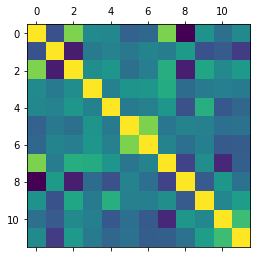

In [14]:
# Graficamos la matriz de correlación
plt.matshow(data.corr())
plt.show()

Como se observa, las variables con mayor correlación con la de quality, tanto positiva como negativa, son las de volatile acidity y alcohol. Por lo tanto, utilizaremos estas variables para nuestro análisis de regresión.

In [16]:
# Obtener número de observaciones para entrenamiento
TRAINOBS = int(data.shape[0] * 0.8)

# Muestra de los datos
sampleX = data.loc[:TRAINOBS, ['volatile acidity', 'alcohol']]
sampleY = data.loc[:TRAINOBS, ['quality']]

def scatterPlot(x, y):
    fig = plt.figure(figsize=(14, 8), dpi= 80, facecolor='w', edgecolor='k')
    plt.scatter(x, y)

In [17]:
# Muestra de los datos
sampleX.head()

,volatile acidity,alcohol
0,0.70,9.4
1,0.88,9.8
2,0.76,9.8
3,0.28,9.8
4,0.70,9.4


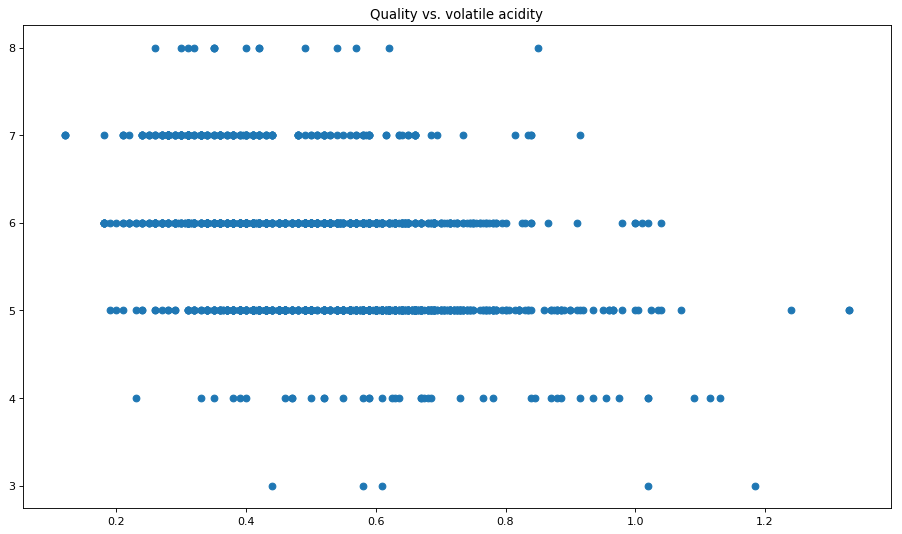

In [18]:
scatterPlot(sampleX['volatile acidity'], sampleY)
plt.title("Quality vs. volatile acidity");

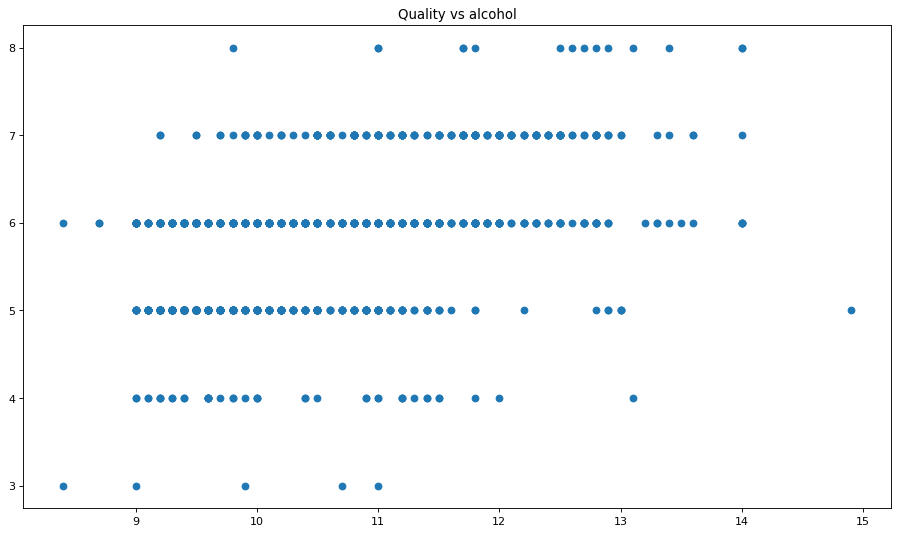

In [19]:
scatterPlot(sampleX['alcohol'], sampleY)
plt.title("Quality vs alcohol");


Como vemos, esperamos una relación positiva en términos de la variable alcohol y una relación negativa con la variable volatile acidity.

Ahora vamos a generar el conjunto de entrenamiento: para esto vamos a crear las características polinomiales que incluiremos en la regresión.

In [33]:
# Conjunto de entrenamiento para X e Y
trainY = sampleY.copy()
trainX = sampleX.copy()
# Agregamos las características a X
trainX.columns = ['a', 'b']
trainX['ab'] = trainX['a'] * trainX['b']
trainX['a^2'] = trainX['a'] * trainX['a']
trainX['b^2'] = trainX['b'] * trainX['b']
# Agregamos la columna de 1 para el intercepto
trainX.insert(0, '', 1)

# Obtenemos el número de parámetros a estimar: K
K = trainX.shape[1]

trainX.head()

,,a,b,ab,a^2,b^2
0,1,0.70,9.4,6.580,0.4900,88.36
1,1,0.88,9.8,8.624,0.7744,96.04
2,1,0.76,9.8,7.448,0.5776,96.04
3,1,0.28,9.8,2.744,0.0784,96.04
4,1,0.70,9.4,6.580,0.4900,88.36


### Construcción del modelo en TensorFlow
En esta sección construiremos el modelo a través de un grafo en TensorFlow. Para esto, construiremos la función de hipótesis, la función de costo y el optimizador (a través de gradiente en descenso de TensorFlow). Finalmente, inicializaremos los parámetros entrenables del modelo. En este caso, se utilizará una función para poder cambiar el grafo de acuerdo al número de parámetros a estimar.

In [34]:
# Crear el grafo
tf.reset_default_graph()
g = tf.Graph()
# Definimos tensores y operaciones en g
with g.as_default():
    # Creando los placeholders
    X = tf.placeholder(tf.float32, shape = (None, K), name = "X")
    Y = tf.placeholder(tf.float32, shape = (None, 1), name = "Y")

    # Hiperparámetros del modelo
    lr = tf.placeholder(tf.float32, name = "lr")

    # Coeficientes de regresión
    W = tf.Variable(tf.zeros([K, 1], tf.float32), name = "W")

    # Función de pronóstico o hipótesis de regresión multiple
    with tf.name_scope("Hipotesis"):
        Yhat = tf.matmul(X, W, name = "Yhat") 

    # Función de costo
    with tf.name_scope("Costo"):
        cost = tf.divide( tf.reduce_mean(tf.pow(Yhat-Y, 2)), 2., name="fCosto")

    # Gradient Descent Optimizer 
    with tf.name_scope("GradientDes.Optimizer"):
        optimizer = tf.train.GradientDescentOptimizer(lr).minimize(cost) 
        # Summary para el TensorBoard
        costSummary = tf.summary.scalar(name='fCosto', tensor = cost)

    # Global Variables Initializer 
    init = tf.global_variables_initializer()

Proceso de entrenamiento
Ahora se realizará el entrenamiento del modelo utilizando un objeto TensorFlow.Session para llevar a cabo la evaluación de los nodos correspondientes.

In [35]:
def entrenarModeloLineal(x, y, training_epochs, learning_rate, imprimirCada):
    # Iniciando la sesión de Tensorflow 
    start = time.time()
    with tf.Session(graph = g) as sess: 
        # Crear el objeto writer
        writer = tf.summary.FileWriter('./multipleReg/K=%d, lr=%f' % (K, learning_rate), sess.graph)
        # Inicializar las variables del grafo 
        sess.run(init) 

        # Iterar para cada batch 
        for epoch in range(training_epochs): 
            # Ejecutar el optimizador de gradiente en descenso y el summary de costo
            _, summary = sess.run([optimizer, costSummary], feed_dict = {X : x, Y : y, lr : learning_rate})
            # Agregarlo al tablero
            writer.add_summary(summary, epoch+1)

            # Mostrar el resultado cada 'imprimirCada'
            if (epoch + 1) % imprimirCada == 0: 
                # Calcular el costo y otros parámetros 
                c, weights = sess.run([cost, W], feed_dict = {X : x, Y : y}) 
                print("E:", (epoch + 1), "\tK=", K,"\tCosto=", c, "\tW_sample=", weights[:3,0]) 

        # Cerrar el writer del summary
        writer.close()
        
        # Guardar algunos valores para utilizar fuera de la sesión
        finalCost = sess.run(cost, feed_dict ={X: x, Y: y}) 
        weights = sess.run(W)
        
    end = time.time()
    print("Tiempo transcurrido: %0.2f segundos. " % (end-start))
        
    return (weights)

Comparación de modelos polinomiales
A continuación, se hará una comparación de modelos de regresión polinomiales utilizando las variables volatile acidity y alcohol. La comparación se hará entre los valores finales de costo obtenidos entre un modelo ajustado con un polinomio de grado 2 y otro modelo polinomial de grado 3.

Entrenamiento con polinomio de grado 2
En este caso, utilizaremos el conjunto de entrenamiento Xtrain, que contiene el polinomio de grado 2 entre las variables volatile acidity y alcohol.

In [36]:
weights = entrenarModeloLineal(trainX, trainY, 300, 0.0001, 30)

E: 30 	K= 6 	Costo= 0.57396644 	W_sample= [0.00094795 0.00045542 0.00738845]
E: 60 	K= 6 	Costo= 0.57085836 	W_sample= [0.00145953 0.00068624 0.01014984]
E: 90 	K= 6 	Costo= 0.56779873 	W_sample= [0.00196827 0.00091401 0.01289599]
E: 120 	K= 6 	Costo= 0.56478673 	W_sample= [0.0024742  0.00113877 0.01562705]
E: 150 	K= 6 	Costo= 0.5618211 	W_sample= [0.00297736 0.00136056 0.01834316]
E: 180 	K= 6 	Costo= 0.5589008 	W_sample= [0.00347775 0.00157942 0.02104448]
E: 210 	K= 6 	Costo= 0.55602473 	W_sample= [0.00397542 0.0017954  0.02373113]
E: 240 	K= 6 	Costo= 0.55319184 	W_sample= [0.00447039 0.00200854 0.02640326]
E: 270 	K= 6 	Costo= 0.5504011 	W_sample= [0.00496269 0.00221887 0.02906103]
E: 300 	K= 6 	Costo= 0.5476515 	W_sample= [0.00545233 0.00242645 0.03170455]
Tiempo transcurrido: 1.00 segundos. 


#### Entrenamiento con polinomio de grado 3
Ahora, haremos la comparación con el polinomio de grado 3 entre las variables volatile acidity y alcohol. Para esto, tenemos que preparar nuevamente nuestro conjunto de entrenamiento Xtrain. Además, es necesario correr nuevamente la definición del grafo, debido a que cambió el valor de K. Esto no se muestra a continuación, para evitar la redundancia de código.

In [42]:
trainX3 = trainX.copy()
# Agregamos las características a X
trainX3['ab^2'] = trainX['a'] * trainX['b^2']
trainX3['ba^2'] = trainX['b'] * trainX['a^2']
trainX3['a^3'] = trainX['a'] ** 3
trainX3['b^3'] = trainX['b'] ** 3

# Obtenemos el número de parámetros a estimar: K
K = trainX3.shape[1]

trainX3.head()

,,a,b,ab,a^2,b^2,ab^2,ba^2,a^3,b^3
0,1,0.70,9.4,6.580,0.4900,88.36,61.8520,4.60600,0.343000,830.584
1,1,0.88,9.8,8.624,0.7744,96.04,84.5152,7.58912,0.681472,941.192
2,1,0.76,9.8,7.448,0.5776,96.04,72.9904,5.66048,0.438976,941.192
3,1,0.28,9.8,2.744,0.0784,96.04,26.8912,0.76832,0.021952,941.192
4,1,0.70,9.4,6.580,0.4900,88.36,61.8520,4.60600,0.343000,830.584


ValueError: Cannot feed value of shape (1280, 10) for Tensor 'X:0', which has shape '(?, 6)'